## 实验四：数据的预测和决策分析实验

### 学号：202110304332；姓名：王鑫坡

### 一、实验目的
1. 理解动态数列的基本概念；
2. 理解数据决策的基本分析方法；
3. 掌握动态数列的趋势预测法和平滑预测法对动态数列进行预测和可视化。
4. 掌握确定性、不确定性及概率决策分析的实现方法。

### 二、 实验内容

In [9]:
#结果多项输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**题目1（30分）：** EuStockMarkets数据集包含了1991～1998年间欧洲主要股票交易市场的日收盘价。该数据是时间序列格式，由1860行和4个变量构成。4个变量分别代表欧洲的4个主要股票市场：Germany DAX (Ibis)，Switzerland SMI，France CAC，UK FTSE。  
（1）请画出该数据的折线图。  
（2）分别用趋势预测方法和平滑预测方法进行预测。

In [123]:
# 题目1
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

from pandas import read_excel

stock_data=read_excel('EuStockMarkets.xlsx')
display(stock_data)


,time,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...,...
1855,1856,5460.43,7721.3,3939.5,5587.6
1856,1857,5285.78,7447.9,3846.0,5432.8
1857,1858,5386.94,7607.5,3945.7,5462.2
1858,1859,5355.03,7552.6,3951.7,5399.5


Text(0.5, 1.0, '1991-1998 volume')

Text(0, 0.5, 'volume')

Text(0.5, 0, 'time')

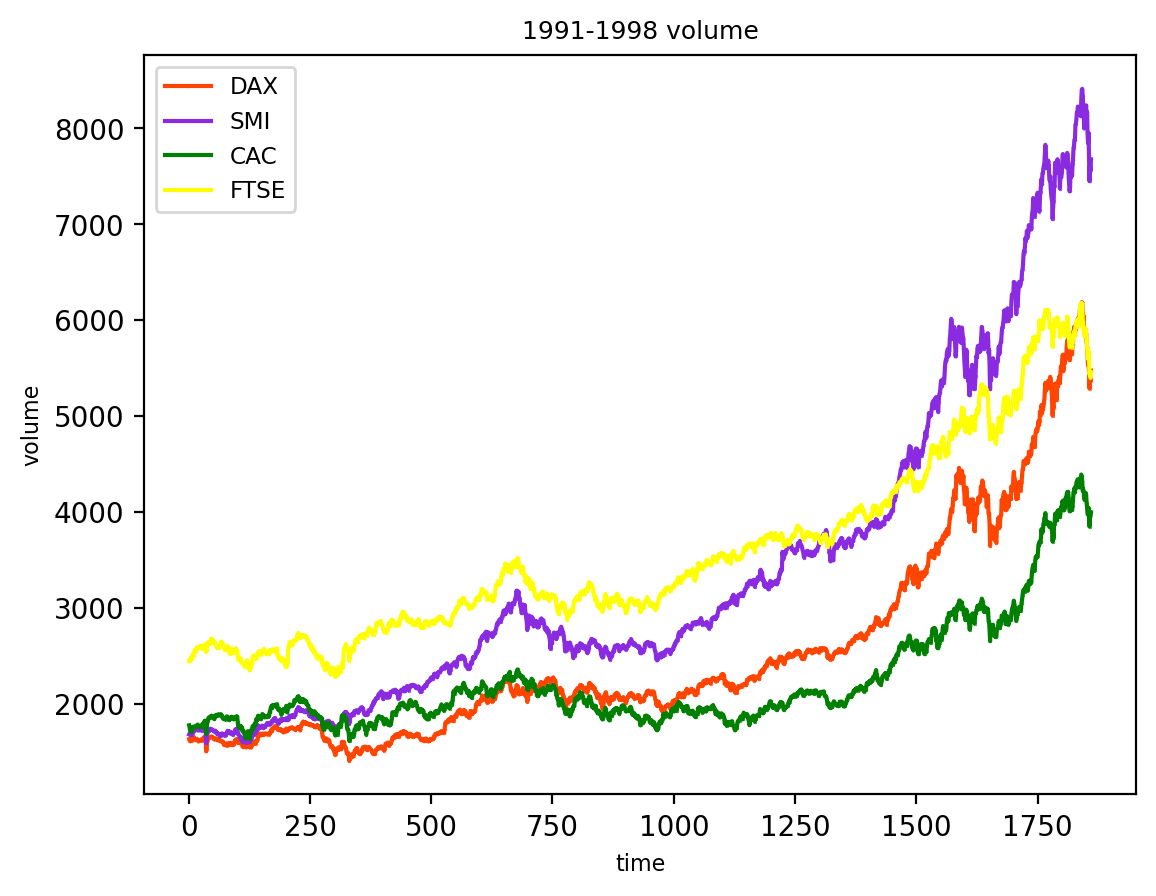

In [124]:
# （1）请画出该数据的折线图。
import matplotlib.pyplot as plt
import pandas as pd                     #加载数据分析包pandas

pd.set_option('display.precision',4)    #设置pandas输出精度
pd.set_option('display.max_rows', 10)
y_1=stock_data['DAX']
y_2=stock_data['SMI']
y_3=stock_data['CAC']
y_4=stock_data['FTSE']
x=stock_data['time']
plt.plot(x, y_1, color='orangered', marker='o',markersize=0.2, linestyle='-', label='DAX')
plt.plot(x, y_2, color='blueviolet', marker='o', markersize=0.2,linestyle='-', label='SMI')
plt.plot(x, y_3, color='green', marker='o',markersize=0.2, linestyle='-', label='CAC')
plt.plot(x, y_4, color='yellow', marker='o',markersize=0.2, linestyle='-', label='FTSE')

plt.title('1991-1998 volume', fontsize='9')

plt.ylabel('volume', fontsize='8')

plt.xlabel('time', fontsize='8')

plt.legend(loc='best',fontsize='small')

plt.show()


<Figure size 720x540 with 0 Axes>

模型检验:
         Coef.    Std.Err.          t  P>|t|  [0.025  0.975]
const  7.1836  6.5674e-03  1093.8162    0.0  7.1707  7.1964
time   0.0006  6.1132e-06   101.8844    0.0  0.0006  0.0006
决定系数：0.8482
模型检验:
         Coef.    Std.Err.          t  P>|t|  [0.025  0.975]
const  7.3007  5.7772e-03  1263.7225    0.0  7.2894  7.3121
time   0.0008  5.3776e-06   144.3133    0.0  0.0008  0.0008
决定系数：0.9181
模型检验:
         Coef.    Std.Err.          t  P>|t|  [0.025  0.975]
const  7.3930  6.6554e-03  1110.8303    0.0  7.3800  7.4061
time   0.0003  6.1951e-06    50.1042    0.0  0.0003  0.0003
决定系数：0.5747
模型检验:
         Coef.    Std.Err.          t  P>|t|  [0.025  0.975]
const  7.7261  3.5496e-03  2176.6243    0.0  7.7191  7.7331
time   0.0005  3.3041e-06   136.3693    0.0  0.0004  0.0005
决定系数：0.9092


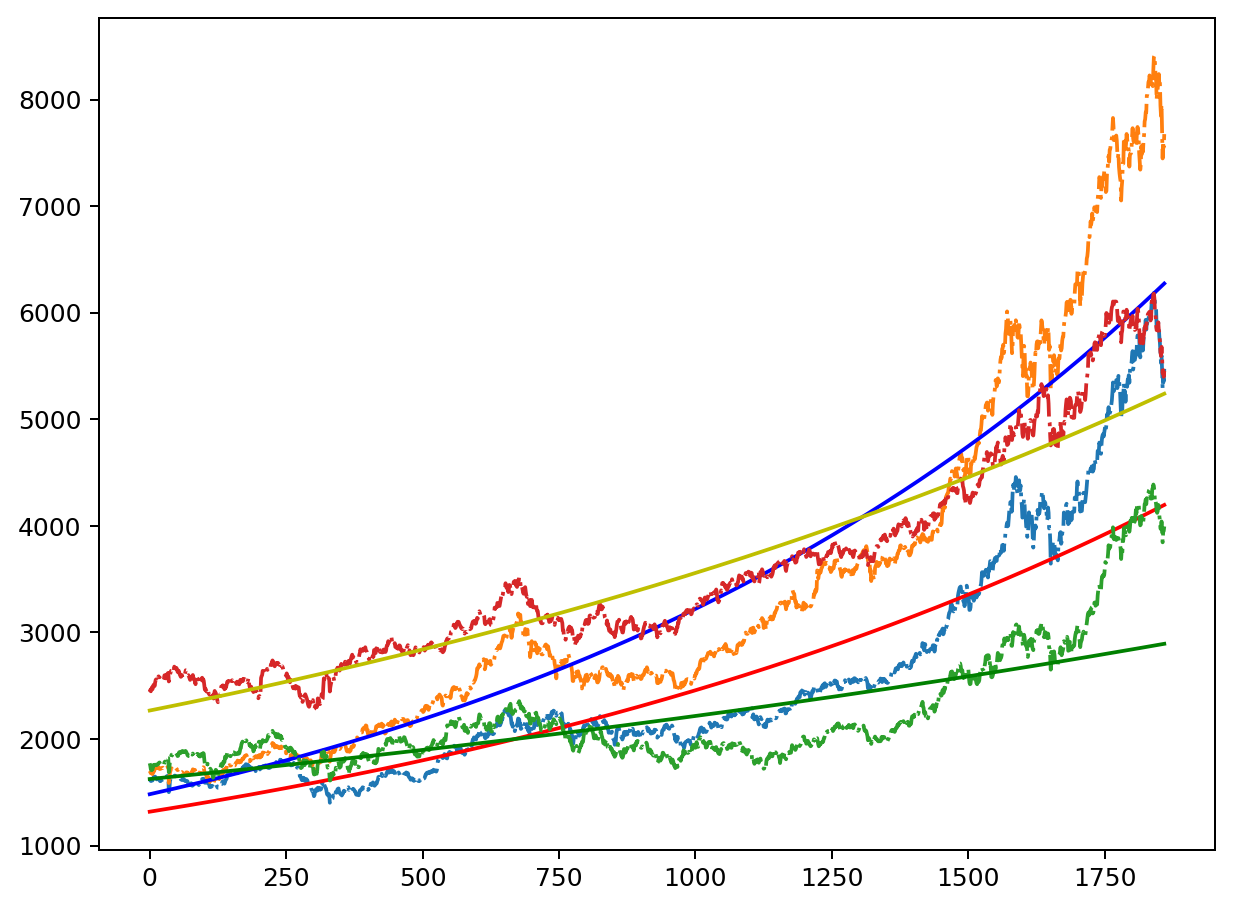

In [125]:
#（2）趋势预测方法
import numpy as np
import statsmodels.api as sm 
import warnings #忽视警告信息,当例数较少时会有警告 
warnings.filterwarnings("ignore") 
def trendmodel(y,x): #定义直线回归模型, x为自变量, y为因变量
    fm=sm.OLS(y,sm.add_constant(x)).fit() 
    sfm=fm.summary2() 
    print("模型检验:\n",sfm.tables[1]) 
    R2=np.corrcoef(x,y)[0,1]**2 #相关系数平方=sfm.tables[0][1][6])
    print("决定系数：%5.4f"%R2)   
    return fm.fittedvalues
plt.figure(figsize = (8,6),dpi = 90)  #确定画布大小
L1=trendmodel(np.log(y_1),x)    
L2=trendmodel(np.log(y_2),x)      
L3=trendmodel(np.log(y_3),x)      
L4=trendmodel(np.log(y_4),x)      
plt.plot(y_1,'-.',np.exp(L1),'r-') 
plt.plot(y_2,'-.',np.exp(L2),'b-') 
plt.plot(y_3,'-.',np.exp(L3),'g-') 
plt.plot(y_4,'-.',np.exp(L4),'y-') 

<Axes: >

<Axes: >

<Axes: >

<Axes: >

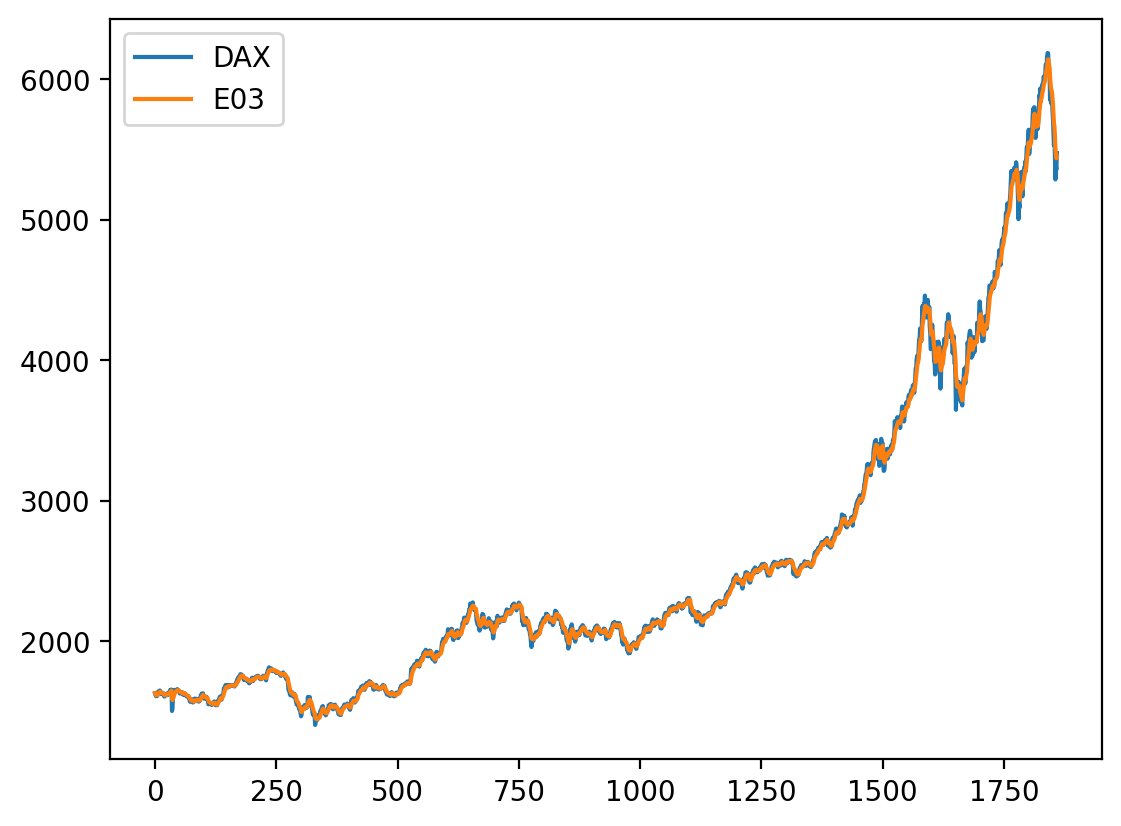

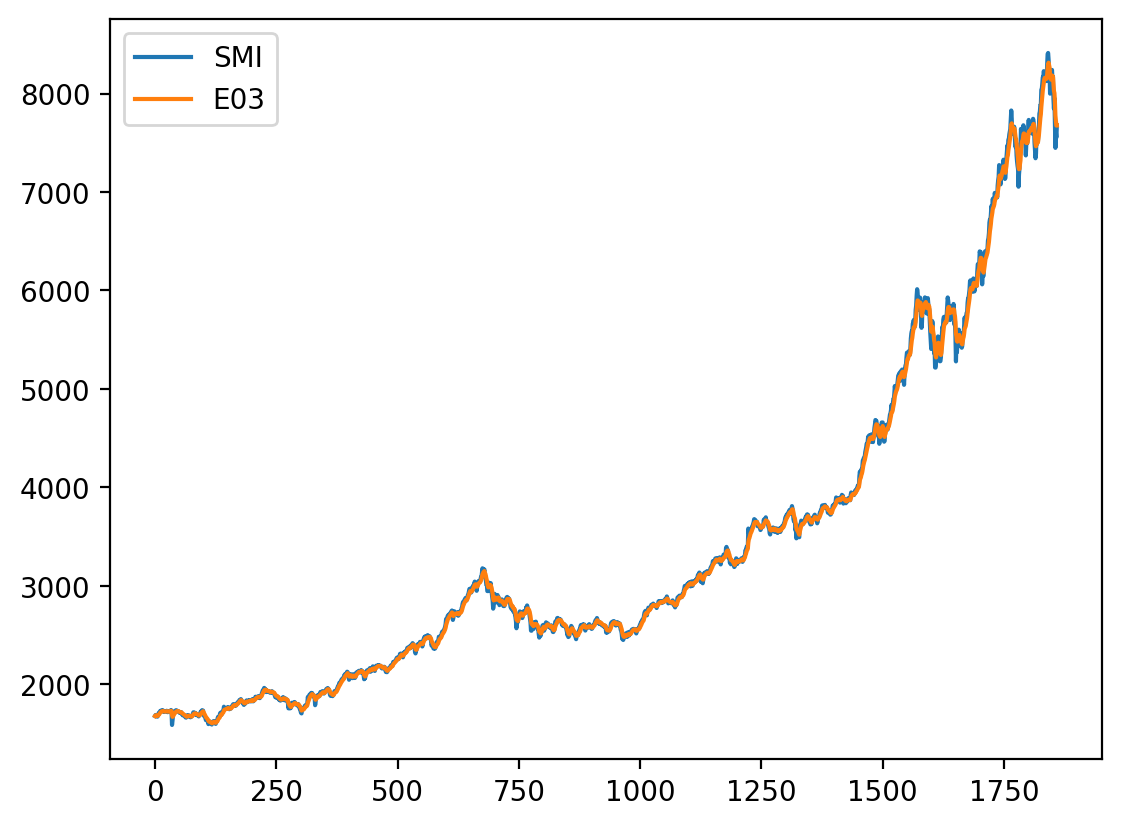

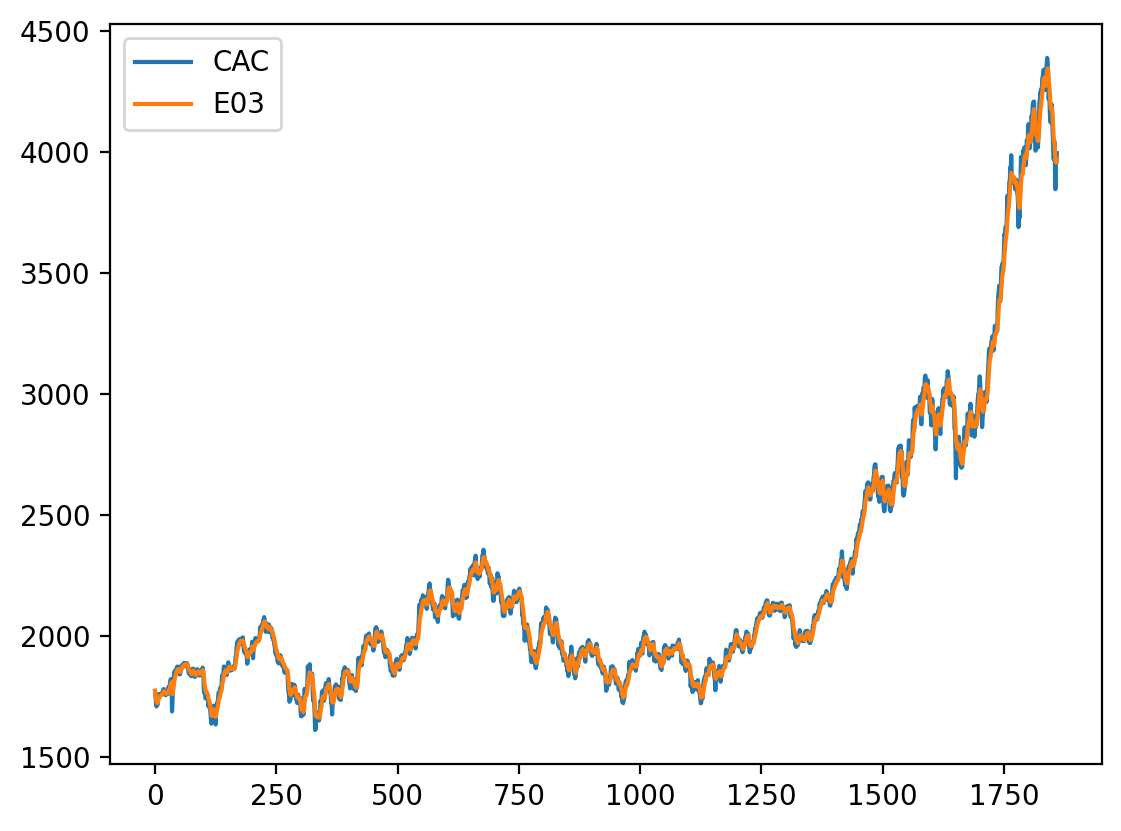

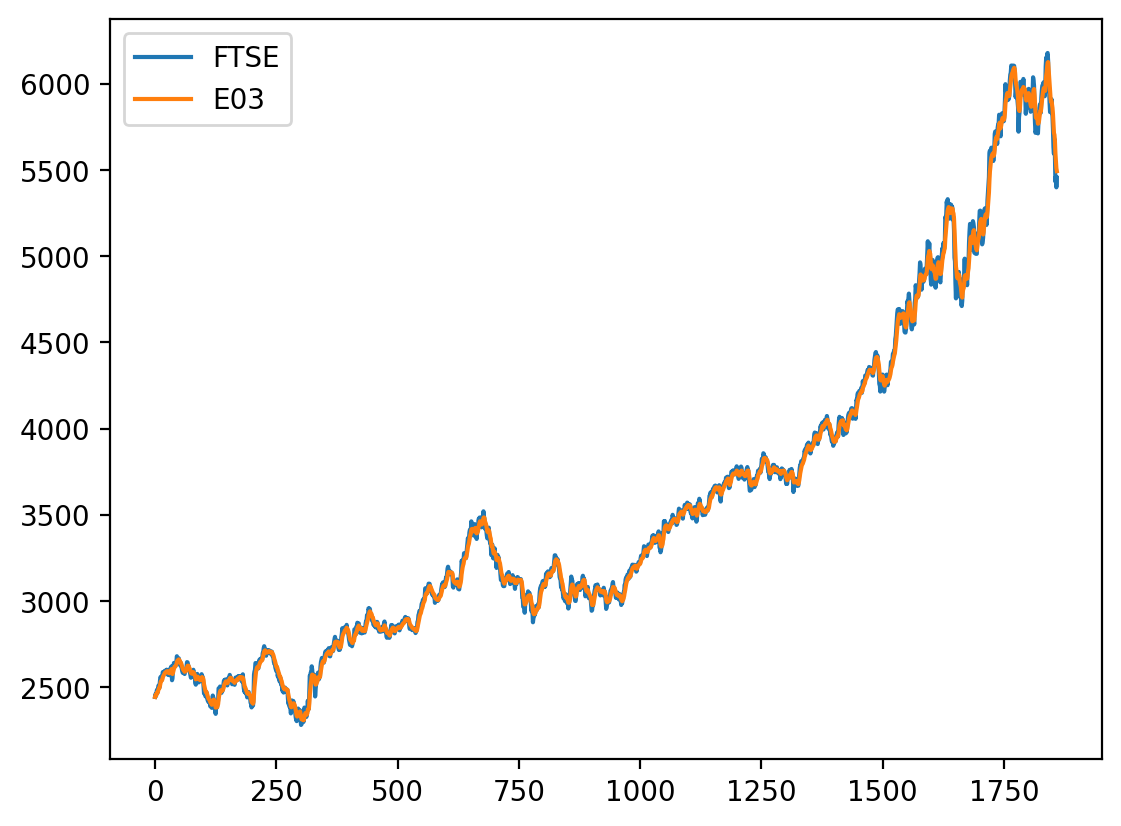

In [126]:
#（3）平滑预测方法
# 设平滑系数为0.3和0.8
QtE=pd.DataFrame(y_1)
QtE['E03']=y_1.ewm(alpha=0.3).mean() #平滑系数=0.3 
QtE.plot()
QtE=pd.DataFrame(y_2)
QtE['E03']=y_2.ewm(alpha=0.3).mean() #平滑系数=0.3 
QtE.plot()
QtE=pd.DataFrame(y_3)
QtE['E03']=y_3.ewm(alpha=0.3).mean() #平滑系数=0.3 
QtE.plot()
QtE=pd.DataFrame(y_4)
QtE['E03']=y_4.ewm(alpha=0.3).mean() #平滑系数=0.3 
QtE.plot()

**题目2（30分）：** JohnsonJohnson数据集包含强生公司1960～1980年间的季度收入。该数据是时间序列格式。  
（1）请画出该数据的折线图。  
（2）分别用趋势预测方法和平滑预测方法进行预测。

模型检验:
           Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const -0.667776  0.034907 -19.129993  5.651369e-32 -0.737217 -0.598334
x1     0.041699  0.000713  58.450601  1.306426e-68  0.040280  0.043118
决定系数：0.9766


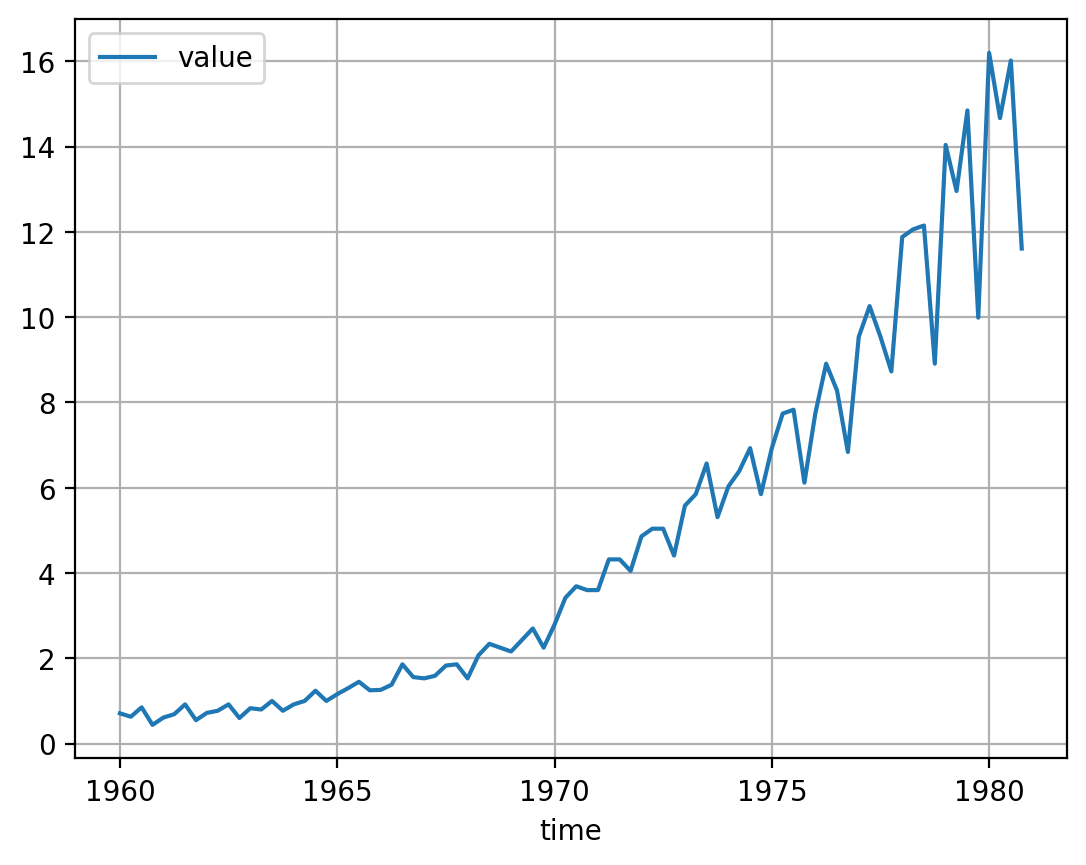

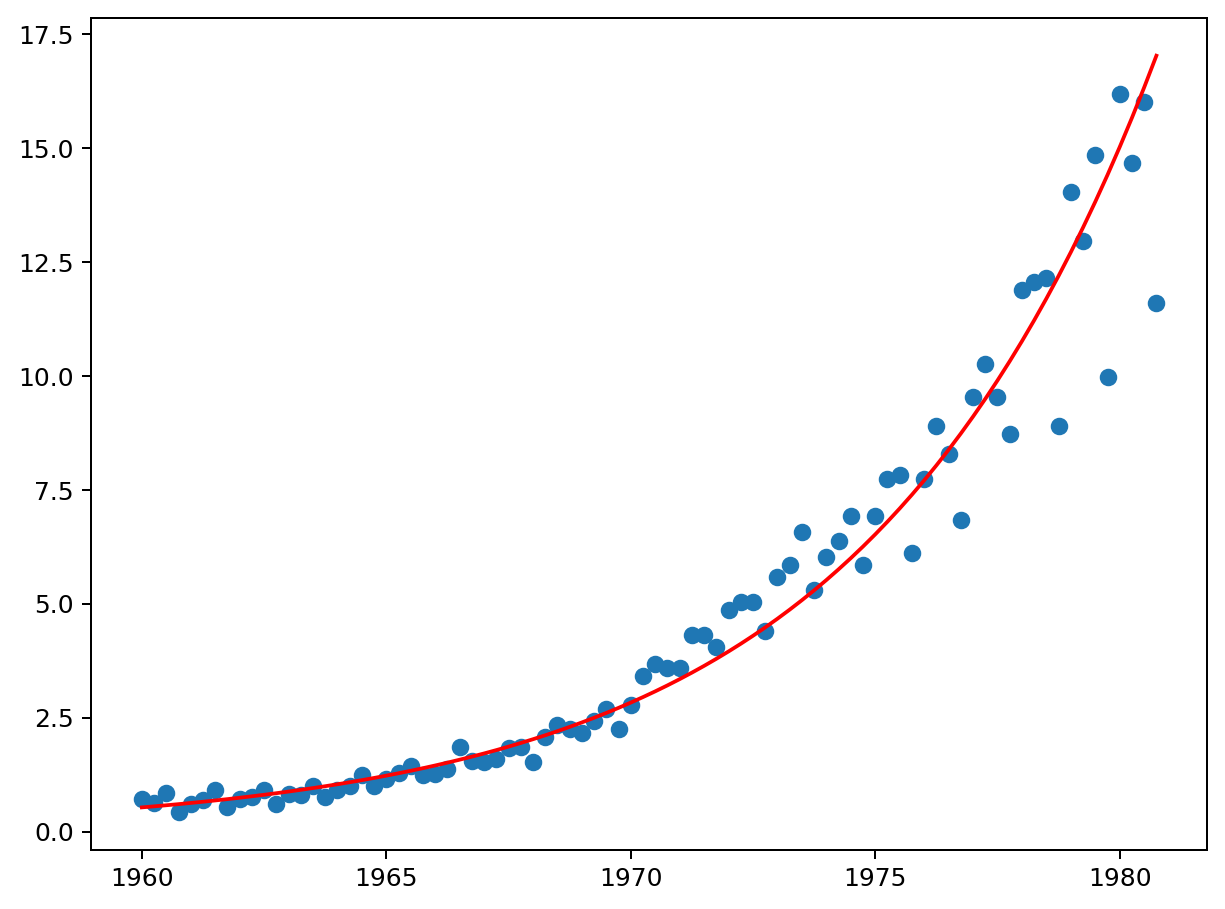

<Axes: xlabel='time'>

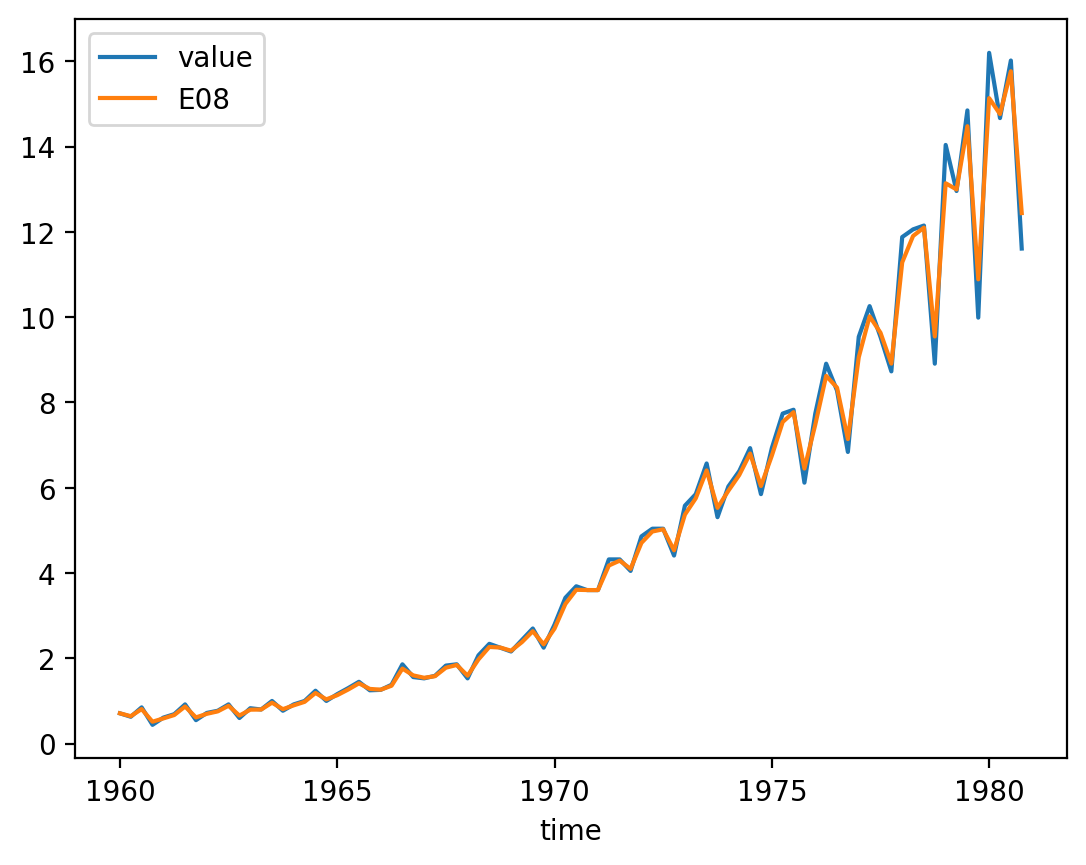

In [5]:
# 题目2
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt


def trendmodel(y, x):  # 定义直线回归模型, x为自变量, y为因变量
 fm = sm.OLS(y, sm.add_constant(x)).fit()
 sfm = fm.summary2()
 print("模型检验:\n", sfm.tables[1])
 R2 = np.corrcoef(x, y)[0, 1]**2  # 相关系数平方=sfm.tables[0][1][6])
 print("决定系数：%5.4f" % R2)
 return fm.fittedvalues
Jodata = pd.read_excel('Johnson.xlsx', index_col=0)
Jodata.plot(grid=True)
# （2）分别用趋势预测方法和平滑预测方法进行预测。
X = np.arange(len(Jodata))+1
Yt = sm.OLS(Jodata['value'], sm.add_constant(X)).fit()
plt.figure(figsize=(8, 6), dpi=90)
L2 = trendmodel(np.log(Jodata['value']), X)
plt.plot(Jodata['value'], 'o', np.exp(L2), 'r-')
plt.show()
Jo = pd.DataFrame(Jodata.value)
Jo['E08'] = Jodata.value.ewm(alpha=0.8).mean()  # 平滑系数=0.8
Jo
Jo.plot()


**题目3（40分）：** 某电视机商家计划投入资金改进生产设备，以提高生产效率、降低生产成本来获取更多的经济收益，针对某种型号的电视机，现拟订如下四个方案。计划改进设备后，该型号电视机的销售单价为3000元/台，预计其年销售数量可达5000台。 该厂选择哪种方案可以获得最大收益？  
电视机商家计划投入资金情况如下表格所示，该数据存放在“**E6-data.xlsx**”中。
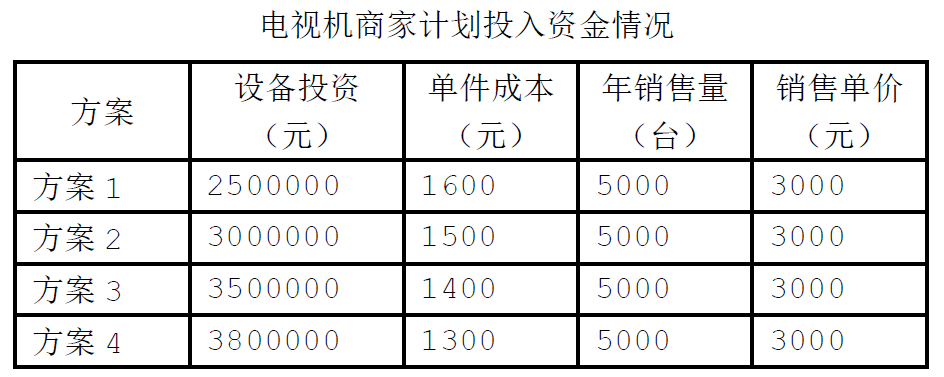  

**任务一：** 试用确定性决策分析中的单目标和多目标求解法对这些方案进行决策分析。  
（1）用单目标求解法进行决策分析；  
（2）用多目标求解法进行决策分析。

**任务二：** 在任务一中，决策分析假设电视机年销售数量固定为5000台，但在实际情况中往往不知道确切的市场需求，这种情况下，假设就可能出现三种自然状态：  
（1）当市场需求量大于预计销售量时，称其处于“畅销”状态，假设市场需求为8000台。  
（2）当市场需求量大致等于预计销售量时，称其处于“一般”状态，假设市场需求为5000台。  
（3）当市场需求量低于预计销售量时，称其处于“滞销”状态，假设市场需求为2000台。  

试用不确定性决策分析中的乐观原则、悲观原则、折中原则和后悔原则对这些方案进行决策分析。

**任务三：** 在任务二中，商家有可能不能确定该型号的电视机将来的市场需求量，但是可以根据市场调研或者相关的历史销售数据得出，这三种状态出现的概率分别为：畅销（0.15）、一般（0.50）、滞销（0.35）。  

试用概率风险决策分析的期望值法和后悔期望值法对这些方案进行决策分析。

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '单目标方案')

'方案3'

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '多目标方案')

'方案2'

,单目标,单目标方案,多目标,多目标方案
方案,,,,
方案1,8100000,False,1960000090000,False
方案2,8800000,False,740000022500,True
方案3,9500000,True,1000000000000,False


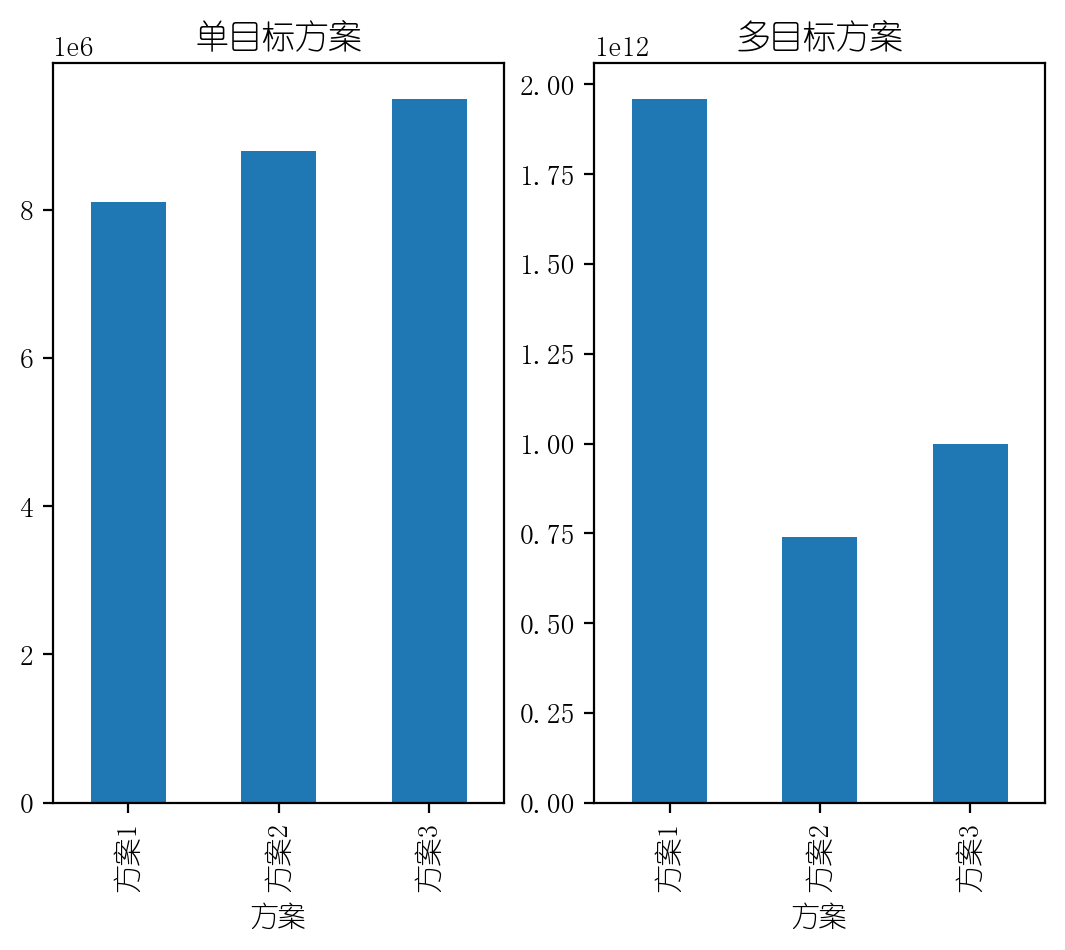

In [12]:
# 任务一
# 试用确定性决策分析中的单目标和多目标求解法对这些方案进行决策分析。
import pandas as pd
import matplotlib
matplotlib.rc("font", family='YouYuan')

Tv=pd.read_excel('DaPy_data.xlsx','Target',index_col=0) 
Tv['年收益']=Tv.年销售量*(Tv.销售单价-Tv.单件成本)-Tv.设备投资 
import matplotlib.pyplot as plt  
plt.subplot(1,2,1)
Tv['年收益'].plot(kind='bar')
plt.title("单目标方案")
Tv['年收益'].idxmax()
Ev=[min(Tv.设备投资), min(Tv.单件成本), max(Tv.年销售量), max(Tv.销售单价),max(Tv.年收益)]
Tv_Ev2=((Tv-Ev))**2
Dv=(Tv_Ev2).sum(1) 
Tv['差距']=Dv 
plt.subplot(1,2,2)
Dv.plot(kind='bar')
plt.title("多目标方案")
Dv.idxmin()
pd.DataFrame({'单目标':Tv['年收益'],'单目标方案':Tv['年收益']==Tv['年收益'].max(),'多目标':Tv['差距'],'多目标方案':Tv['差距']==Tv['差距'].min()})

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '乐观原则分析')

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '悲观原则分析')

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '折中原则分析')

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '后悔原则分析')

,畅销,一般,滞销,乐观,悲观,折中,后悔
方案,,,,,,,
方案1,8100000,4500000,900000,8100000,900000,3420000.0,1400000
方案2,8800000,4750000,700000,8800000,700000,3535000.0,700000
方案3,9500000,5000000,500000,9500000,500000,3650000.0,400000


,乐观,乐观方案,悲观,悲观方案,折中,折中方案,后悔,后悔方案
方案,,,,,,,,
方案1,8100000,False,900000,True,3420000.0,False,1400000,False
方案2,8800000,False,700000,False,3535000.0,False,700000,False
方案3,9500000,True,500000,False,3650000.0,True,400000,True


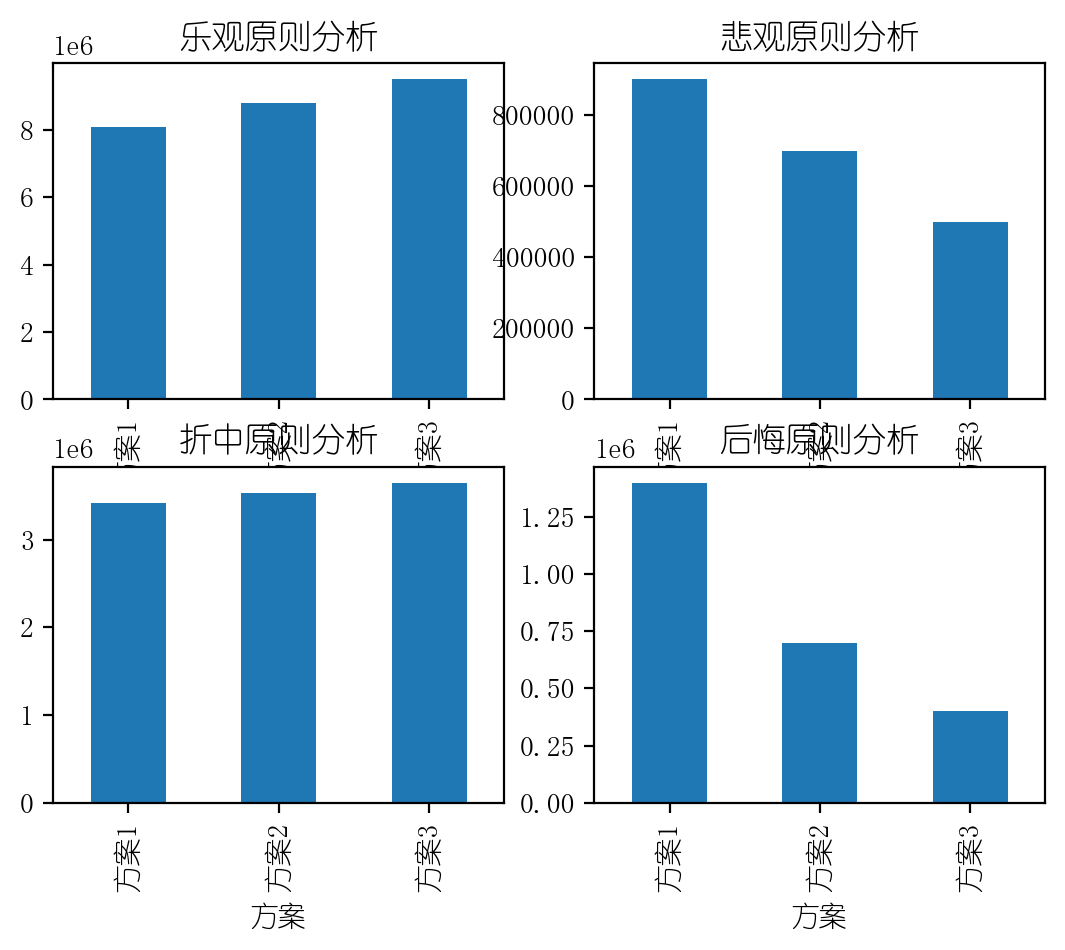

In [13]:
# 任务二
# 试用不确定性决策分析中的乐观原则、悲观原则、折中原则和后悔原则对这些方案进行决策分析。
plt.rcParams['axes.unicode_minus']=False #正常显示图中负号
PLm=pd.DataFrame() 
PLm['畅销']= 8000*(Tv.销售单价-Tv.单件成本)-Tv.设备投资
PLm['一般']= 5000*(Tv.销售单价-Tv.单件成本)-Tv.设备投资
PLm['滞销']= 2000*(Tv.销售单价-Tv.单件成本)-Tv.设备投资
lg=PLm.max(axis=1)
BQD=PLm.copy()
BQD['乐观']=lg
plt.subplot(2,2,1)
lg.plot(kind='bar')
plt.title("乐观原则分析")
bg=PLm.min(1)
BQD['悲观']=bg
plt.subplot(2,2,2)
bg.plot(kind='bar')
plt.title("悲观原则分析")
a=0.35
zz= a*lg + (1-a)*bg
BQD['折中']=zz
plt.subplot(2,2,3)
zz.plot(kind='bar')
plt.title("折中原则分析")
Rm=PLm.max()-PLm
hh=Rm.max(1)
BQD['后悔']=hh
plt.subplot(2,2,4)
hh.plot(kind='bar')
plt.title("后悔原则分析")
BQD
pd.DataFrame({'乐观':lg,'乐观方案':lg==lg.max(),'悲观':bg,'悲观方案':bg==bg.max(),
 '折中':zz,'折中方案':zz==zz.max(),'后悔':hh,'后悔方案':hh==hh.min()})

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '概率风险决策分析的期望值法')

<Axes: >

<Axes: xlabel='方案'>

Text(0.5, 1.0, '后悔期望值法')

,期望值,期望方案,后悔期望值,后悔期望方案
方案,,,,
方案1,3375000.0,False,3375000.0,False
方案2,3500000.0,False,3500000.0,False
方案3,3625000.0,True,3625000.0,True


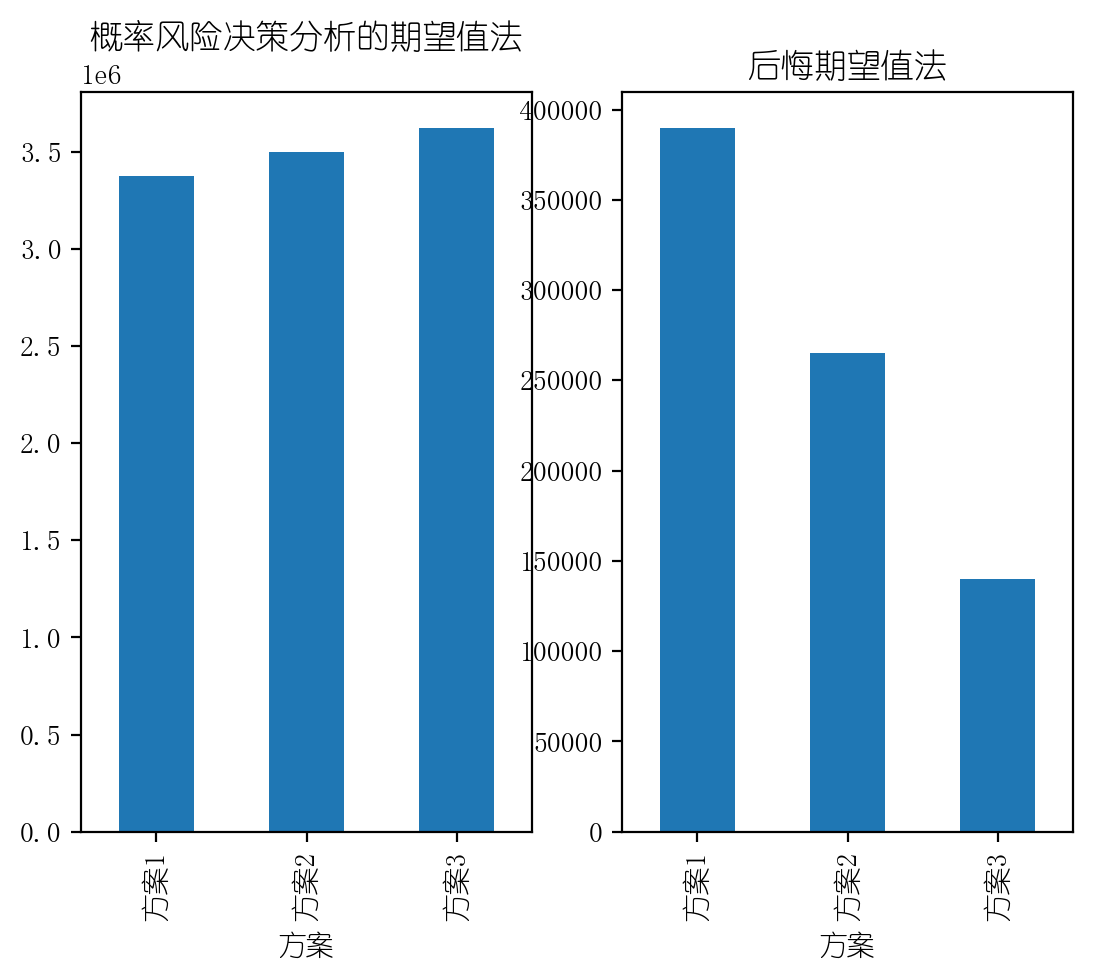

In [14]:
# 任务三
# 试用概率风险决策分析的期望值法和后悔期望值法对这些方案进行决策分析。
probE=[0.10,0.50,0.35]
qw=(probE*PLm).sum(1)
PROB=PLm.copy()
PROB['期望值法']=qw
plt.subplot(1,2,1)
qw.plot(kind='bar')
plt.title("概率风险决策分析的期望值法")
hhqw=(probE*Rm).sum(1)
plt.subplot(1,2,2)
hhqw.plot(kind='bar')
plt.title("后悔期望值法")
PROB['后悔期望值法']=hhqw
pd.DataFrame({'期望值':qw,'期望方案':qw==qw.max(),
 '后悔期望值':qw,'后悔期望方案':hhqw==hhqw.min()})

### 实验总结与心得体会

本次实验让我了解了数据的预测和决策性分析，以及可视化分析的重要性。通过分析已有的调查资料和统计数据，可以发现现象中的隐藏规律性，并基于此做出未来发展的预测并做出正确的分析和决策。

在进行数据分析的过程中，需要考虑数据的可靠性和稳定性。数据的来源和采集方式会对数据的可靠性产生影响，因此在进行数据分析前需要对数据进行清洗和处理，确保数据的准确性和可靠性。

在进行可视化分析时，需要选择合适的图表类型来呈现数据，使得数据更加清晰易懂。同时，还需要考虑受众的背景和需求，以便更好地传达数据的含义和趋势。

通过本次实验，我学会了如何进行数据分析和可视化分析，并且了解了数据预测和决策性分析的基本原理和方法。这些技能在未来的职业生涯中将非常有用，能够帮助我更好地理解和应用数据，做出正确的决策和预测。

### 实验成绩：

________________________________